## Imports

In [1]:
#General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Hiding Pink Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Importing data from CSVs into DataFrames

In [2]:
#Importing data
train = pd.read_csv('../datasets/train.csv', na_values = "", keep_default_na = False)
test = pd.read_csv('../datasets/test.csv', na_values = "", keep_default_na = False)

In [3]:
train.shape

(2051, 81)

In [4]:
train['SalePrice'].mean()

181469.70160897123

In [5]:
train['SalePrice'].median()

162500.0

In [6]:
train['SalePrice'][train['SalePrice']>400000].shape

(46,)

### Removal of 'Gr Liv Area' Outliers identified by Dean De Cock, who gathered the intial data file collected by the Ames, Iowa Assessor’s Office 
The researcher who originally analyzed the data this was taken from indicated 5 observations that are outliers due to partial sales that most likely do not reflect accurate market values. The researcher suggested to remove any data points with a "Gr Liv Area" value greater than 4000 to remove these outliers, which I am going to do. These sales are indicated by the analyst as partial, which is a categorical value of a column called "Sale Condition". "Sale Condition" is not a listed feature in the training or testing data sets.

In [7]:
train[train['Gr Liv Area']>4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


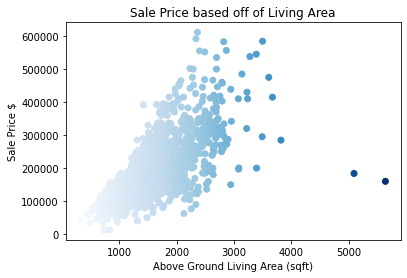

In [8]:
plt.scatter(x=train['Gr Liv Area'],y=train['SalePrice'],c=train['Gr Liv Area'], cmap = 'Blues')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price $')
plt.title('Sale Price based off of Living Area');

In [9]:
#Removing 'Gr Liv Area' Outliers
train = train[train['Gr Liv Area']<4000]

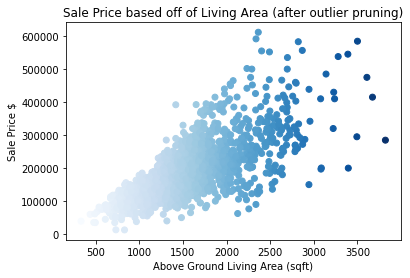

In [10]:
plt.scatter(x=train['Gr Liv Area'],y=train['SalePrice'],c=train['Gr Liv Area'], cmap = 'Blues')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price $')
plt.title('Sale Price based off of Living Area (after outlier pruning)');

### Lot Area - Dropping extreme outliers
Removing three entries whose 'Lot Area' values are more than 9 standard deviations from the mean lot area of the data set

In [11]:
lot_area_std = train['Lot Area'].std()
lot_area_std

6608.511748863536

In [12]:
lot_area_mean = train['Lot Area'].mean()
lot_area_mean

10024.677891654466

In [13]:
(train['Lot Area'][train['Lot Area']>60000]-train['Lot Area'].mean())/train['Lot Area'].std()

471     22.542946
694     15.907412
1854     9.190620
Name: Lot Area, dtype: float64

In [14]:
(train[train['Lot Area']>60000])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NA,IR2,Low,...,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NA,IR2,Low,...,0,0,NA,NA,NA,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,NA,IR1,Low,...,0,0,NA,NA,NA,0,12,2006,WD,280000


Text(0.5, 1.0, 'Housing Sale Price Based off of Property Size')

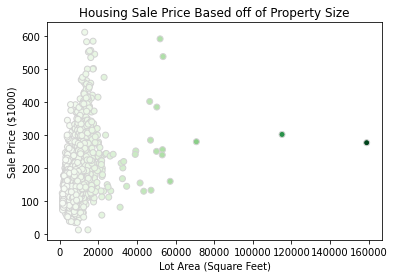

In [15]:
plt.scatter(x=train['Lot Area'],y=train['SalePrice']/1000,c=train['Lot Area'], cmap = 'Greens',edgecolors='lightgray')
plt.xlabel('Lot Area (Square Feet)')
plt.ylabel('Sale Price ($1000)')
plt.title('Housing Sale Price Based off of Property Size')

In [16]:
print(train.shape)
train = train[train['Lot Area']<60000]
print(train.shape)

(2049, 81)
(2046, 81)


Text(0.5, 1.0, 'Housing Sale Price Based off of Property Size')

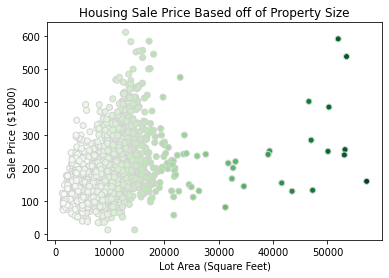

In [17]:
plt.scatter(x=train['Lot Area'],y=train['SalePrice']/1000,c=train['Lot Area'], cmap = 'Greens',edgecolors='lightgray')
plt.xlabel('Lot Area (Square Feet)')
plt.ylabel('Sale Price ($1000)')
plt.title('Housing Sale Price Based off of Property Size')

## Preliminary Data Inspection

In [18]:
print(train.shape)
print(test.shape)
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

(2046, 81)
(878, 80)
508
209


### Displays all columns that have missing values and the number of missing values they have

In [19]:
def display_null(df):
    #displays the columns of a data frame with null values
    for n in df.columns:
        if df[n].isnull().sum() > 0:
            print(f'{n}: {df[n].isnull().sum()}')
    pass

In [20]:
def display_garage(df,entry):
    print('Displaying Garage data for data entry:',entry)
    print('Garage Type:',df.iloc[entry]['Garage Type'])
    print('Garage Year Built:',df.iloc[entry]['Garage Yr Blt'])
    print('Garage Finish:',df.iloc[entry]['Garage Finish'])
    print('Garage Cars:',df.iloc[entry]['Garage Cars'])
    print('Garage Area:',df.iloc[entry]['Garage Area'])
    print('Garage Quality:',df.iloc[entry]['Garage Qual'])
    print('Garage Condition:',df.iloc[entry]['Garage Cond'])
    if df.iloc[entry]['Misc Feature']=='Gar2':
        print(f'Entry #{entry} has a second garage')
    pass
def display_basement(df,entry):
    print('Displaying Basement data for data entry:',entry)
    print('Quality (Height):',df.iloc[entry]['Bsmt Qual'])
    print('Condition:',df.iloc[entry]['Bsmt Cond'])
    print('Exposure:',df.iloc[entry]['Bsmt Exposure'])
    print('Rating of basement finished area (Type 1):',df.iloc[entry]['BsmtFin Type 1'])
    print('Type 1 finished square feet:',df.iloc[entry]['BsmtFin SF 1'])
    print('Rating of basement finished area (Type 2):',df.iloc[entry]['BsmtFin Type 2'])
    print('Type 2 finished square feet:',df.iloc[entry]['BsmtFin SF 2'])
    print('Unfinished sq ft of basement area:',df.iloc[entry]['Bsmt Unf SF'])
    print('Total are of basement in sq ft:',df.iloc[entry]['Total Bsmt SF'])
    print('Basement Full Bathrooms:',df.iloc[entry]['Bsmt Full Bath'])
    print('Basement Half Bathrooms:',df.iloc[entry]['Bsmt Half Bath'])
    pass

#### I'm using the below code to display the missing value sums in each column because train.isnull().sum() does not display all 81 columns, and so I'm using a for loop to ignore the columns with no missing values

In [21]:
#Displaying Nulls for Train Data
display_null(train)

Lot Frontage: 328
Mas Vnr Type: 22
Mas Vnr Area: 22
Bsmt Qual: 1
Bsmt Cond: 1
Bsmt Exposure: 4
BsmtFin Type 1: 1
BsmtFin SF 1: 1
BsmtFin Type 2: 2
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Garage Yr Blt: 114
Garage Finish: 1
Garage Cars: 1
Garage Area: 1
Garage Qual: 1
Garage Cond: 1


In [22]:
#Desplaying Nulls for Test Data
display_null(test)

Lot Frontage: 160
Mas Vnr Type: 1
Mas Vnr Area: 1
Electrical: 1
Garage Yr Blt: 45
Garage Finish: 1


In [23]:
#Showing the row where every garage value is missing except Garage Type
#For future reference, it's entry 1712
train[train['Garage Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,...,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [24]:
#Showing all values missing in entry 1712
train[pd.isna(train['Garage Cars'])==True]
for i in range(len(train.columns)):
    if pd.isna(train.iloc[1712,i]):
        print(train.columns[i],'-->',train.iloc[1712,i])

In [25]:
"""Even though row 1712 is the only entry in trains.csv with missing Garage Finish, Cars, Area, Qual and Cond values,
we won't be dropping it specifically in order to avoid hardcoding values"""
display_garage(train,1712)

Displaying Garage data for data entry: 1712
Garage Type: Attchd
Garage Year Built: 2006.0
Garage Finish: RFn
Garage Cars: 2.0
Garage Area: 472.0
Garage Quality: TA
Garage Condition: TA


In [26]:
#In case I want to simplify the columns later
#train.columns = [n.lower() for n in train.columns]
#train.columns

### Filling Empty Lot Frontage Values

In [27]:
area_mean = train['Lot Area'].mean()
area_median = train['Lot Area'].median()
front_mean = train['Lot Frontage'].mean()
front_median = train['Lot Frontage'].median()

print("Lot Area Mean:",area_mean)
print("Lot Area Median:",area_median)
print("Lot Frontage Mean:",front_mean)
print("Lot Frontage Median:",front_median)

train_mean_area_frontage_ratio = (train['Lot Area']/train['Lot Frontage']).mean()
print('Average Lot Area:Lot Frontage ratio:',train_mean_area_frontage_ratio)


train['Lot Frontage'].fillna(train['Lot Area']/train_mean_area_frontage_ratio,inplace=True)
#Using the same Ratio in the test data for consistency
#test['Lot Frontage'].fillna(test['Lot Area']/train_mean_area_frontage_ratio,inplace=True)

Lot Area Mean: 9870.799120234604
Lot Area Median: 9400.0
Lot Frontage Mean: 68.88300349243306
Lot Frontage Median: 68.0
Average Lot Area:Lot Frontage ratio: 140.0230675449925


#### Using train's average Lot Area to Lot Frontage ratio on the test dataset to be consistent when filling null values

In [28]:
test['Lot Frontage'].fillna(test['Lot Area']/train_mean_area_frontage_ratio,inplace=True)

### Year Garage was Built Column
All entries with missing Garage Year Built values are houses without garages. I'm intentionally leaving them null as I can use the null values to make a has_garage column where houses without garages are labeled as null.

### Filling Missing Garage Values (excluding year built)

In [29]:
train['Garage Finish'].fillna('NA',inplace=True)
train['Garage Cars'].fillna(0,inplace=True)
train['Garage Area'].fillna(0,inplace=True)
train['Garage Qual'].fillna('NA',inplace=True)
train['Garage Cond'].fillna('NA',inplace=True)

In [30]:
test['Garage Finish'].fillna('NA',inplace=True)

### Ensuring that all entries with a garage area of 0 have their Garage Type entry equal to 'NA'

In [31]:
train['Garage Type'][train['Garage Area']==0] = 'NA'
#checking output
train['Garage Type'][train['Garage Area']==0].value_counts()

NA    114
Name: Garage Type, dtype: int64

### Adding a column to indicate the age of a house's garage based on the year it was sold.
The Garage Age column in training data should have 114 null values

In [32]:
train['Garage Age'] = train['Yr Sold'] - train['Garage Yr Blt']
test['Garage Age'] = test['Yr Sold'] - test['Garage Yr Blt']

In [33]:
train['Garage Age'] = train['Yr Sold'] - train['Garage Yr Blt']
train.drop(train[train["Garage Age"]<0].index,inplace=True)

In [34]:
#Entry with negative Garage Age, could be fixed by referencing the 'Year Remod/Add' column,
#but we're going to drop it to avoid hard coding 
#train.loc[1699,'Garage Yr Blt']
#train.loc[1699,'Garage Yr Blt'] = 2007

In [35]:
for n in train.columns:
    if train[n].isnull().sum() > 0:
        print(f'{n}: {train[n].isnull().sum()}')

Mas Vnr Type: 21
Mas Vnr Area: 21
Bsmt Qual: 1
Bsmt Cond: 1
Bsmt Exposure: 4
BsmtFin Type 1: 1
BsmtFin SF 1: 1
BsmtFin Type 2: 2
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Garage Yr Blt: 114
Garage Age: 114


#### There are some values that are missing their Basement Exposure values but are not missing any other basement values, instead of marking the house as not having a basement, we're filling these values with 'No' values indicating the basements have no exposure

In [36]:
train['Bsmt Exposure'][train['Bsmt Qual'].isna()==False] = train['Bsmt Exposure'][train['Bsmt Qual'].isna()==False].fillna('No')
train['Bsmt Exposure'][train['Bsmt Qual'].isna()==False].isna().sum()

0

In [37]:
#Specific row with all basement values empty
#train.loc[1327][train.loc[1327].isna() == True]

#### Filling Empty Basement Values with values that indicate a basement is not present

In [38]:
train['Bsmt Qual'].fillna('NA',inplace=True)
train['Bsmt Cond'].fillna('NA',inplace=True)
train['Bsmt Exposure'].fillna('NA',inplace=True)
train['BsmtFin Type 1'].fillna('NA',inplace=True)
train['BsmtFin SF 1'].fillna(0,inplace=True)
train['BsmtFin Type 2'].fillna('NA',inplace=True)
train['BsmtFin SF 2'].fillna(0,inplace=True)
train['Bsmt Unf SF'].fillna(0,inplace=True)
train['Total Bsmt SF'].fillna(0,inplace=True)
train['Bsmt Full Bath'].fillna(0,inplace=True)
train['Bsmt Half Bath'].fillna(0,inplace=True)

#### Filling null values in 'Mas Vnr Area' and 'Mas Vnr Type' columns with 0 and 'None' respectively to indicate that the property does not have masonry veneer walls

In [39]:
train[['Mas Vnr Area','Mas Vnr Type']].isna().sum()

Mas Vnr Area    21
Mas Vnr Type    21
dtype: int64

In [40]:
train['Mas Vnr Type'].fillna('None',inplace=True)
train['Mas Vnr Area'].fillna(0,inplace=True)
test['Mas Vnr Type'].fillna('None',inplace=True)
test['Mas Vnr Area'].fillna(0,inplace=True)

### Certain entries contained illogical Masonry Veener entries.
#### Some house entries contain 'Mas Vnr Type' values that indicate a house has a Masonry Veneer wall, but the 'Mas Vnr Area' value is indicated as 0 square feet which implies there is none recorded. The 'Mas Vnr Type' cases in these cases are being reassigned to 'None'.

In [41]:
train['Mas Vnr Type'][train['Mas Vnr Area'] == 0].value_counts()

None       1233
BrkFace       2
Stone         1
Name: Mas Vnr Type, dtype: int64

In [42]:
train['Mas Vnr Type'][train['Mas Vnr Area'] == 0] = 'None'

#### Other house entries contain 'Mas Vnr Type' values that indicate a house does not have a Masonry Veneer wall, but their "Mas Vnr Area' value is greater than zero, indicating there is some measurement. Because we have no way to determine what material the wall might be, the 'Mas Vnr Type' values are being kept as 'None' and the area values are being assigned to 0.

In [43]:
train[['Mas Vnr Type','Mas Vnr Area']][train['Mas Vnr Area'] > 0][train['Mas Vnr Type'] == 'None']

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
810,None,288.0
1148,None,1.0
1684,None,1.0
1832,None,344.0


In [44]:
train['Mas Vnr Area'][train['Mas Vnr Type'] == 'None'] = 0

### Filling empty Electrical values with Standard Circuit Breakers, the most common electrical value (mode).

In [45]:
test['Electrical'].fillna('SBrkr',inplace=True)

### Final check for missing values, the only NaN values should be 114 entries for "Garage Yr Blt" and "Garage Age". The Test Data Frame should have 45 NaN values.
These can be used to make a "Has Garage" Column later on

In [46]:
display_null(train)

Garage Yr Blt: 114
Garage Age: 114


In [47]:
display_null(test)

Garage Yr Blt: 45
Garage Age: 45


# Replacing score columns with numberical values

In [48]:
#columns that need scoring
#round(train['SalePrice'].groupby(train['Neighborhood']).mean(),2).sort_values(ascending=True)
train['Exter Qual'].value_counts()

TA    1245
Gd     695
Ex      79
Fa      26
Name: Exter Qual, dtype: int64

In [49]:
#Score Dictionary
exterior_scores = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Exterior Quality
train['Exter Qual'] = train['Exter Qual'].map(exterior_scores).astype(int)
test['Exter Qual'] = test['Exter Qual'].map(exterior_scores).astype(int)
#Exterior Condition
train['Exter Cond'] = train['Exter Cond'].map(exterior_scores).astype(int)
test['Exter Cond'] = test['Exter Cond'].map(exterior_scores).astype(int)

In [50]:
#Score Dictionary
basement_scores = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Basement Quality
train['Bsmt Qual'] = train['Bsmt Qual'].map(basement_scores).astype(int)
test['Bsmt Qual'] = test['Bsmt Qual'].map(basement_scores).astype(int)
#Basement Condition
train['Bsmt Cond'] = train['Bsmt Cond'].map(basement_scores).astype(int)
test['Bsmt Cond'] = test['Bsmt Cond'].map(basement_scores).astype(int)

In [51]:
#Score Dictionary
exposure_scores = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
#Basement Exposure
train['Bsmt Exposure'] = train['Bsmt Exposure'].map(exposure_scores).astype(int)
test['Bsmt Exposure'] = test['Bsmt Exposure'].map(exposure_scores).astype(int)

In [52]:
#Score Dictionary
finish_scores = {'NA':0,'Unf':1,'LwQ':2,'BLQ':3,'Rec':4,'ALQ':5,'GLQ':6}
#Basement Finish Type 1
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(finish_scores).astype(int)
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map(finish_scores).astype(int)
#Basement Finish Type 2
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(finish_scores).astype(int)
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map(finish_scores).astype(int)

In [53]:
#Score Dictionary
heating_scores = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Heating Quality/Condition
train['Heating QC'] = train['Heating QC'].map(heating_scores).astype(int)
test['Heating QC'] = test['Heating QC'].map(heating_scores).astype(int)

In [54]:
#Has Central Air Conditioning
yes_no = {'Y':1,'N':0}
#Center Air Conditioning
train['Central Air'] = train['Central Air'].map(yes_no).astype(int)
test['Central Air'] = test['Central Air'].map(yes_no).astype(int)

In [55]:
#Score Dictionary
kitchen_scores = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Kitchen Quality
train['Kitchen Qual'] = train['Kitchen Qual'].map(kitchen_scores).astype(int)
test['Kitchen Qual'] = test['Kitchen Qual'].map(kitchen_scores).astype(int)

In [56]:
#Score Dictionary
fireplace_scores = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Fireplace Quality
train['Fireplace Qu'] = train['Fireplace Qu'].map(fireplace_scores).astype(int)
test['Fireplace Qu'] = test['Fireplace Qu'].map(fireplace_scores).astype(int)

In [57]:
#Score Dictionary
garage_scores = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
#Basement Quality
train['Garage Qual'] = train['Garage Qual'].map(basement_scores).astype(int)
test['Garage Qual'] = test['Garage Qual'].map(basement_scores).astype(int)
#Basement Condition
train['Garage Cond'] = train['Garage Cond'].map(garage_scores).astype(int)
test['Garage Cond'] = test['Garage Cond'].map(garage_scores).astype(int)

## Replacing all 'NA' values with 'empty' so that pandas.to_csv() doesn't interpret them as null values and delete them when writing new files

In [58]:
train.replace('NA','not_app',inplace=True)
test.replace('NA','not_app',inplace=True)

In [59]:
train.to_csv('../datasets/train_cleaned.csv')
test.to_csv('../datasets/test_cleaned.csv')

In [60]:
train2 = pd.read_csv("../datasets/train_cleaned.csv")
test2 = pd.read_csv("../datasets/test_cleaned.csv")

In [61]:
display_null(train)

Garage Yr Blt: 114
Garage Age: 114


In [62]:
display_null(train2)

Garage Yr Blt: 114
Garage Age: 114
